# Multilayer perceptron MLP

This practical will introduce you to the MNIST dataset as well 
as to tensorflow

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

The MNIST dataset is a set of greyscale images with 28*28=784 pixels.
Each image is a number between 0 and 9.
The goal of the practical is to obtain a classifier that can correctly 
classify the images into the 10 classes.
The MNIST data consists of 55000 train images and labels, 5000 observations
validation set and 10000 observations in the test set.
for more information about it visit : http://yann.lecun.com/exdb/mnist/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Question 1: What is the first number of the training data? Why is the label a vector and not a number from 0 to 9 ? Plot the corresponding image.

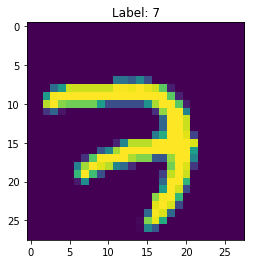

In [7]:
x_train = mnist.train.images[:5000,:]
y_train = mnist.train.labels[:5000,:]

label = y_train[0].argmax(axis=0)
image = x_train[0].reshape([28,28])
plt.title('Label: %d' % (label))
plt.imshow(image)
plt.show()

# 1st part: Softmax regression
We are going to do the simplest possible neural network with no hidden
layers. So we have 28*28=784 input nodes and 10 output nodes.

# Question 2: What is the dimension of the model ?

Tensorflow relies on a highly efficient C++ backend to do its computation.
The connection to this backend is called a session. The common usage for 
TensorFlow programs is to first create a graph and then launch it in 
a session.

In [3]:

x = tf.placeholder(tf.float32, [None, 784])#input
W = tf.Variable(tf.zeros([784, 10]))#weights
b = tf.Variable(tf.zeros([10]))#bias


tf.matmul(x, W) + b defines the evidence supporting each class.
The softmax operator exponentiates the evidence and normalizes the vector
in order to obtain a probability distribution over the 10 classes.

# Question 3: Write this as a mathematical formula.

In [4]:
y = tf.nn.softmax(tf.matmul(x, W) + b)#predictions
y_ = tf.placeholder(tf.float32, [None, 10])#labels*

The objective funcion we will minimize is cross-entropy defined in the 
following line.

# Question 4: Write cross-entropy as a mathematical formula. Why do we use cross-entropy and not classification error ?

In [5]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

Tensorflow has different optimizers already coded. So, no need to code 
gradient descent again.

In [6]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

You need to initialize variables.

In [7]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


This is the session where calculations encoded in the graph will
take place.

In [8]:
sess = tf.Session()
sess.run(init)#initialisation

The training step is run 1000 times with mini-batches of 100 observations.

In [9]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

To evaluate the performance of the classifier, we use the following
three lines

In [10]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9206


# Question 5: Is there overfitting?

# Question 6: Visualize the weights used to classify as 0.

Plot the test error as a function of the number of iterations of gradient descent.

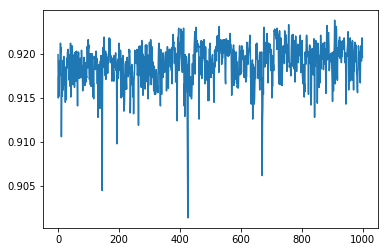

In [11]:

acc_test=np.zeros(1000)
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  acc_test[i]=sess.run(accuracy,feed_dict={x: mnist.test.images,y_:mnist.test.labels})

plt.plot(acc_test)

close session

In [12]:
sess.close()